In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart-customer-review-and-rating/data.csv


In [2]:
#!ls '/kaggle/input/flipkart-customer-review-and-rating'

# ***EDA and Text preprocessing***

In [3]:
df = pd.read_csv('/kaggle/input/flipkart-customer-review-and-rating/data.csv')

In [4]:
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [5]:
df.isnull().sum() # no null value found in dataset

review    0
rating    0
dtype: int64

In [6]:
# 5 unique ratings
n = len(pd.unique(df['rating']))
  
print("No.of.unique values :", 
      n)

No.of.unique values : 5


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


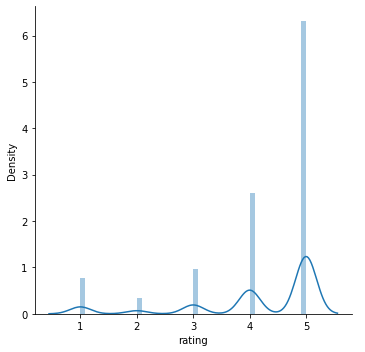

In [8]:
# histogram 
sns.FacetGrid(df, size=5) \
   .map(sns.distplot, "rating") \
   .add_legend();
plt.show();

### ***By Histogram***
- majority ratings lies between 4 and 5 getting rough idea with histogram

In [9]:
#pdf and cdf
counts, bin_edges = np.histogram(df['rating'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

[0.06926624 0.         0.03107458 0.         0.         0.08861267
 0.         0.23706897 0.         0.57397755]
[1.  1.4 1.8 2.2 2.6 3.  3.4 3.8 4.2 4.6 5. ]


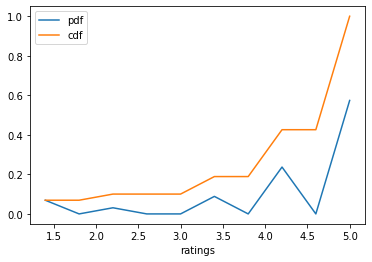

In [10]:
cdf = np.cumsum(pdf)
a=plt.plot(bin_edges[1:],pdf)
b=plt.plot(bin_edges[1:], cdf)

plt.xlabel("ratings")
plt.legend(['pdf','cdf'])
plt.show()

### ***By Pdf and Cdf***
- with more confident i can say majority ratings lie between 4 and 5

## ***Text preprocessing***

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re
# changing words which contain short forms like change won't to will not and etc
def decontracted(phrase):
    
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
# https://gist.github.com/sebleier/554280
# removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [13]:
# text before preprocessing
print(0, df['review'].values[0])
print(1, df['review'].values[1])
print(2, df['review'].values[2])
print(3, df['review'].values[3])
print(4, df['review'].values[4])

0 It was nice produt. I like it's design a lot.  It's easy to carry. And.   Looked stylish.READ MORE
1 awesome sound....very pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE
2 awesome sound quality. pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output. Bass and treble are really very clear without equaliser. With equaliser, sound wary depends on the handset sound quality.Weightless to carry and in head tooMic is good, but in traffic it is not too good (3.25/5)3.5mm Option is really important to mention. Really expecting other leading brands to implement this.ConsVery tight in ears. adjusters are ok .. this ll be very tight...READ MORE
3 I think it is such a good product not only as per the quality but also the design is quite good . I m using this product from January ... In this pandamic situation it has became the most useful and helpful . Overall the bass and the sound quality is pretty 

In [14]:
# replacing // with empty space and etc if present
# https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
        sent = emoji_pattern.sub(r'', sent)
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [15]:
text = ['For some, emoji have caused frustration for users (how the heck are you supposed to use the 🙃 emoji?',
        '(how the heck are you supposed to use the 🙃 emoji?']
preprocess_text(text)

100%|██████████| 2/2 [00:00<00:00, 1790.52it/s]


['emoji caused frustration users heck supposed use emoji',
 'heck supposed use emoji']

In [16]:
preprocessed_review = preprocess_text(df['review'].values)

100%|██████████| 9976/9976 [00:00<00:00, 14173.79it/s]


In [17]:
# text after preprocessing
print(0, preprocessed_review[0])
print(1, preprocessed_review[1])
print(2, preprocessed_review[2])
print(3, preprocessed_review[3])
print(4, preprocessed_review[4])

0 nice produt like design lot easy carry looked stylish read
1 awesome sound pretty see nd sound quality good wish take product loved product read
2 awesome sound quality pros 7 8 hrs battery life including 45 mins approx call time awesome sound output bass treble really clear without equaliser equaliser sound wary depends handset sound quality weightless carry head toomic good traffic not good 3 25 5 3 5mm option really important mention really expecting leading brands implement consvery tight ears adjusters ok tight read
3 think good product not per quality also design quite good using product january pandamic situation became useful helpful overall bass sound quality pretty good another thing give sigh relief provide wire help case lacking charges read
4 awesome bass sound quality good bettary long life purchase rs 999 really grateful product not forget likeread


In [18]:
# sentiment analyzing
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sent = SentimentIntensityAnalyzer()
neg = []
neu = []
pos = []
com = []
def update(k):
    neg.append(k["neg"])    
    pos.append(k["pos"])
    neu.append(k["neu"])
    com.append(k["compound"])

for i in tqdm(df['review']):
    update(sent.polarity_scores(i))

df["negative"] = neg
df["neutral"] = neu 
df["positive"] = pos  
df["compound"] = com

100%|██████████| 9976/9976 [00:02<00:00, 3683.56it/s]


In [19]:
df.head()

,review,rating,negative,neutral,positive,compound
0,It was nice produt. I like it's design a lot. ...,5,0.0,0.613,0.387,0.8020
1,awesome sound....very pretty to see this nd th...,5,0.0,0.517,0.483,0.9501
2,awesome sound quality. pros 7-8 hrs of battery...,4,0.0,0.823,0.177,0.9310
3,I think it is such a good product not only as ...,5,0.0,0.672,0.328,0.9851
4,awesome bass sound quality very good bettary l...,5,0.0,0.595,0.405,0.9053


In [20]:
# assigning 1 to the ratings >=4 rest 0
pos_neg = []
for i in range(len(df['rating'])):
    if df['rating'][i] >= 4:
        pos_neg.append(1)
    else:
        pos_neg.append(0)

In [21]:
df['class label'] = pos_neg

In [22]:
df.head()

,review,rating,negative,neutral,positive,compound,class label
0,It was nice produt. I like it's design a lot. ...,5,0.0,0.613,0.387,0.8020,1
1,awesome sound....very pretty to see this nd th...,5,0.0,0.517,0.483,0.9501,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,0.0,0.823,0.177,0.9310,1
3,I think it is such a good product not only as ...,5,0.0,0.672,0.328,0.9851,1
4,awesome bass sound quality very good bettary l...,5,0.0,0.595,0.405,0.9053,1


In [23]:
# taking max of compound centiment
df['compound'].max()

0.991

In [24]:
# taking min of compound centiment
df['compound'].min()

-0.9587

In [25]:
# only one compount sentiment is equal to min value of sentiment
c=0
for i in range(len(df['compound'])):
    if df['compound'][i] == df['compound'].min():
        c+=1
print(c)

1


In [26]:
# compound sentiment <= 0.8 and >= 0.0
c=0
for i in range(len(df['compound'])):
    if df['compound'][i] <= 0.8 and df['compound'][i] >= 0.0:
        c+=1
print(c)

6737


In [27]:
# 67.5% compound sentiment lies in between 0.0 and 0.8
total_len = len(df['compound'])
perc = (c/total_len)*100
print(perc)

67.53207698476344


In [28]:
# where class label == 1
c=0
for i in range(len(df['class label'])):
    if df['class label'][i] == 1:
        c+=1
print(c)

8091


In [29]:
# total % of class label == 1
total_len = len(df['class label'])
perc = (c/total_len)*100
print(perc)

81.1046511627907


**81.1% data is positive imbalance dataset**

1    8091
0    1885
Name: class label, dtype: int64


<AxesSubplot:ylabel='Type'>

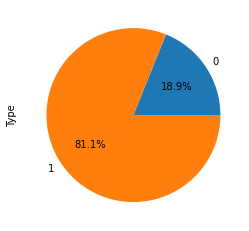

In [30]:
# vizuals of class label
print(df["class label"].value_counts())

df.groupby('class label').size().plot(kind='pie',
                                       y = "class label",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [31]:
# coppy df
final_data = df  

In [32]:
rating_4_and_more = final_data[final_data["rating"] >= 4]
rating_less_than_4  = final_data[final_data["rating"] < 4]
print(rating_4_and_more.shape)
print(rating_less_than_4.shape)

(8091, 7)
(1885, 7)


In [33]:
#upsampling
from sklearn.utils import resample
rating_less_than_4_upsample = resample(rating_less_than_4,
             replace=True,
             n_samples=len(rating_4_and_more),
             random_state=42)

print(rating_less_than_4_upsample.shape)

(8091, 7)


0    8091
1    8091
Name: class label, dtype: int64


<AxesSubplot:ylabel='Type'>

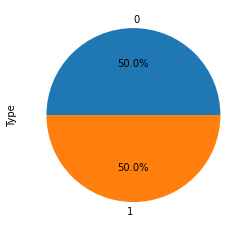

In [34]:
# vizuals of class label after upsampling
data_up_sampled = pd.concat([rating_less_than_4_upsample, rating_4_and_more])

print(data_up_sampled["class label"].value_counts())

data_up_sampled.groupby('class label').size().plot(kind='pie',
                                       y = "class label",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [35]:
data_up_sampled.shape

(16182, 7)

# ***Vectorizing text data***

In [36]:
y = data_up_sampled['class label'].values 
X = data_up_sampled.drop(['class label'], axis=1)

In [37]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state = 42)

In [38]:
X_train.head()

,review,rating,negative,neutral,positive,compound
80,I was really excited about the headphones at f...,1,0.211,0.667,0.122,-0.9209
4701,Excellent productREAD MORE,5,0.000,0.351,0.649,0.5719
6048,GoodREAD MORE,3,0.000,1.000,0.000,0.0000
1099,it's battery is very good and sound it's just ...,5,0.000,0.641,0.359,0.9391
3141,Good as well as the picREAD MORE,5,0.000,0.500,0.500,0.6124


## ***Preparing data for modeling***

In [39]:
#tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

vectorizer_tfidf = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=100000)
vectorizer_tfidf.fit(X_train['review'].values)

X_train_review_tfidf = vectorizer_tfidf.transform(X_train['review'].values)
X_test_review_tfidf = vectorizer_tfidf.transform(X_test['review'].values)

print("After vectorizations")
print(X_train_review_tfidf.shape, y_train.shape)
print(X_test_review_tfidf.shape, y_test.shape)

(10841, 6) (10841,)
(5341, 6) (5341,)
After vectorizations
(10841, 6087) (10841,)
(5341, 6087) (5341,)


In [40]:
#normalizing
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

normalizer.fit(X_train['rating'].values.reshape(-1,1))

X_train_rating_norm = normalizer.transform(X_train['rating'].values.reshape(-1,1))
X_test_rating_norm = normalizer.transform(X_test['rating'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_rating_norm.shape, y_train.shape)
print(X_test_rating_norm.shape, y_test.shape)

After vectorizations
(10841, 1) (10841,)
(5341, 1) (5341,)


In [41]:
normalizer.fit(X_train['negative'].values.reshape(-1,1))

X_train_neg_norm = normalizer.transform(X_train['negative'].values.reshape(-1,1))
X_test_neg_norm = normalizer.transform(X_test['negative'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_neg_norm.shape, y_train.shape)
print(X_test_neg_norm.shape, y_test.shape)

After vectorizations
(10841, 1) (10841,)
(5341, 1) (5341,)


In [42]:
normalizer.fit(X_train['neutral'].values.reshape(-1,1))

X_train_neu_norm = normalizer.transform(X_train['neutral'].values.reshape(-1,1))
X_test_neu_norm = normalizer.transform(X_test['neutral'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_neu_norm.shape, y_train.shape)
print(X_test_neu_norm.shape, y_test.shape)

After vectorizations
(10841, 1) (10841,)
(5341, 1) (5341,)


In [43]:
normalizer.fit(X_train['positive'].values.reshape(-1,1))

X_train_pos_norm = normalizer.transform(X_train['positive'].values.reshape(-1,1))
X_test_pos_norm = normalizer.transform(X_test['positive'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_pos_norm.shape, y_train.shape)
print(X_test_pos_norm.shape, y_test.shape)

After vectorizations
(10841, 1) (10841,)
(5341, 1) (5341,)


In [44]:
normalizer.fit(X_train['compound'].values.reshape(-1,1))

X_train_comp_norm = normalizer.transform(X_train['compound'].values.reshape(-1,1))
X_test_comp_norm = normalizer.transform(X_test['compound'].values.reshape(-1,1))



print("After vectorizations")
print(X_train_comp_norm.shape, y_train.shape)
print(X_test_comp_norm.shape, y_test.shape)

After vectorizations
(10841, 1) (10841,)
(5341, 1) (5341,)


In [45]:
# stacking data creating final data to feed the model
from scipy.sparse import hstack
X_tr1 = hstack((X_train_review_tfidf, X_train_rating_norm, X_train_neg_norm, X_train_neu_norm, 
                X_train_pos_norm, X_train_comp_norm)).tocsr()
X_te1 = hstack((X_test_review_tfidf, X_test_rating_norm, X_test_neg_norm, X_test_neu_norm, 
               X_test_pos_norm, X_test_comp_norm)).tocsr()

print("Final Data matrix")
print(X_tr1.shape, y_train.shape)
print(X_te1.shape, y_test.shape)


Final Data matrix
(10841, 6092) (10841,)
(5341, 6092) (5341,)


## ***Hyperparameter tuning and modeling***

In [46]:
#gbdt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [1,2,3,4], 'n_estimators': [5, 10, 15, 20]}
gbdt_tfidf = GradientBoostingClassifier(learning_rate=0.1) 
gbdtclf_set_1 = GridSearchCV(gbdt_tfidf, params, cv=5, scoring='roc_auc', return_train_score=True, n_jobs=-1)
gbdtclf_set_1.fit(X_tr1,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [5, 10, 15, 20]},
             return_train_score=True, scoring='roc_auc')

In [47]:
print('Best score: ',gbdtclf_set_1.best_score_)
print('alpha value with best score: ',gbdtclf_set_1.best_params_)

Best score:  0.8859697962350668
alpha value with best score:  {'max_depth': 4, 'n_estimators': 20}


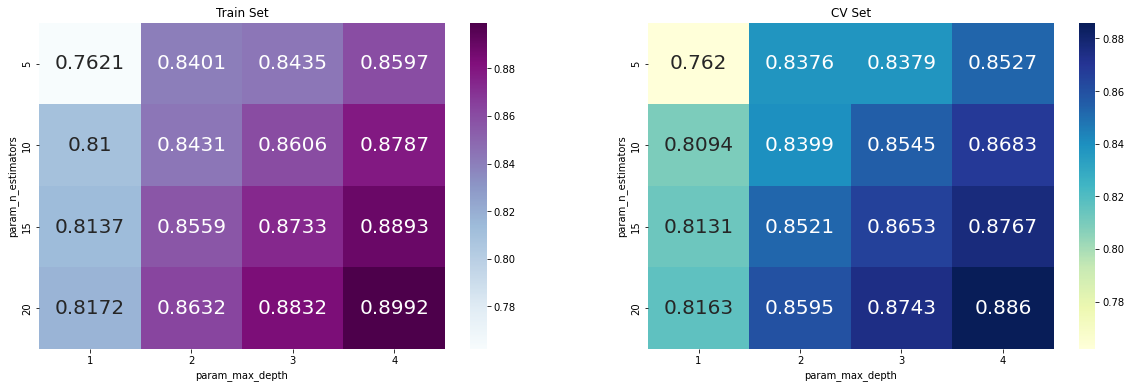

In [48]:
#ploting heat map for best hyperparameter
import matplotlib.pyplot as plt
import seaborn as sns
results = pd.DataFrame.from_dict(gbdtclf_set_1.cv_results_)
max_score_set_1 = results.groupby(['param_n_estimators', 'param_max_depth']).max()
max_score_set_1 = max_score_set_1.unstack()[['mean_test_score', 'mean_train_score']]
#sns.heatmap(max_scores.mean_test_score, annot=True, fmt='.4g');
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(max_score_set_1.mean_train_score, annot = True, fmt='.4g', ax=ax[0],annot_kws={"size": 20}, cmap = "BuPu")
sns.heatmap(max_score_set_1.mean_test_score, annot = True, fmt='.4g', ax=ax[1],annot_kws={"size": 20},cmap="YlGnBu")
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show() 
# reference:
# https://stackoverflow.com/questions/56302647/how-to-plot-a-heatmap-and-find-best-hyperparameter-for-decision-tree-after-grids

In [49]:
#gbdt with best params
gbdt_tfidf_best = GradientBoostingClassifier(learning_rate=0.1,max_depth=4,n_estimators=20) 
gbdt_tfidf_best.fit(X_tr1,y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=20)

In [50]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

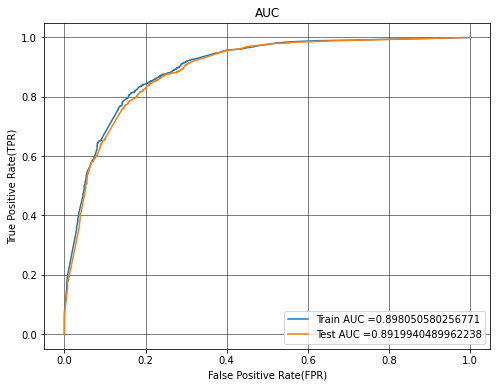

In [51]:
#Auc curve
y_train_probs_tfidf_set1 = gbdt_tfidf_best.predict_proba(X_tr1)[:,1] # converting train and test output into probability
y_test_probs_tfidf_set1 = gbdt_tfidf_best.predict_proba(X_te1 )[:,1]

train_fpr_tfidf_set1, train_tpr_tfidf_set1, tr_thresholds_tfidf_set1 = roc_curve(y_train, y_train_probs_tfidf_set1) # storing values of fpr and tpr
test_fpr_tfidf_set1, test_tpr_tfidf_set1, te_thresholds_tfidf_set1 = roc_curve(y_test, y_test_probs_tfidf_set1)

plt.figure(figsize=(8,6))
plt.plot(train_fpr_tfidf_set1, train_tpr_tfidf_set1, label="Train AUC ="+str(auc(train_fpr_tfidf_set1, train_tpr_tfidf_set1)))
plt.plot(test_fpr_tfidf_set1, test_tpr_tfidf_set1, label="Test AUC ="+str(auc(test_fpr_tfidf_set1, test_tpr_tfidf_set1)))
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("AUC")
plt.grid(color='black',lw=0.5)

In [52]:
# https://stackoverflow.com/questions/31417487/sklearn-logisticregression-and-changing-the-default-threshold-for-classification
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [53]:
# https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
best_t_tfidf_set1_train = find_best_threshold(tr_thresholds_tfidf_set1, train_fpr_tfidf_set1, train_tpr_tfidf_set1)
cm=metrics.confusion_matrix(y_train,predict_with_best_t(y_train_probs_tfidf_set1, best_t_tfidf_set1_train))

the maximum value of tpr*(1-fpr) 0.6804226559144396 for threshold 0.563


In [54]:
best_t_tfidf_set1_test = find_best_threshold(te_thresholds_tfidf_set1, test_fpr_tfidf_set1, test_tpr_tfidf_set1)
cm1=metrics.confusion_matrix(y_test,predict_with_best_t(y_test_probs_tfidf_set1, best_t_tfidf_set1_test))

the maximum value of tpr*(1-fpr) 0.6662736255831465 for threshold 0.549


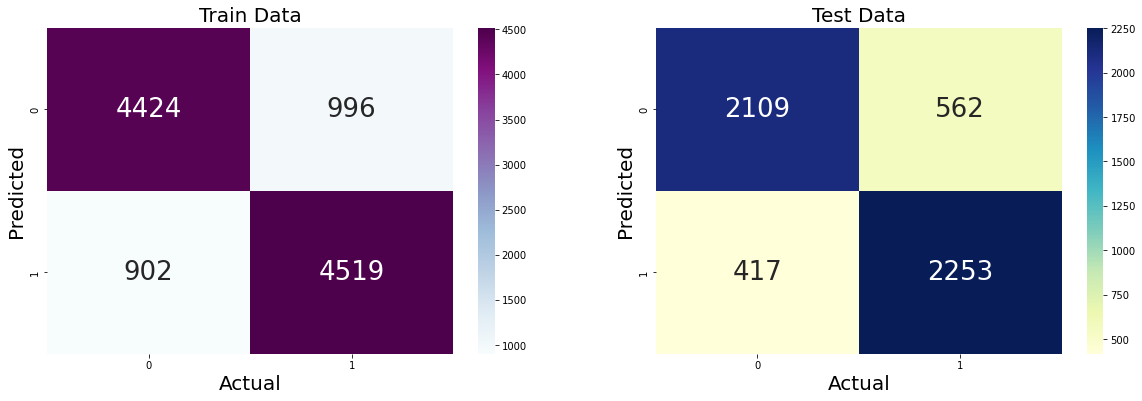

In [55]:
#ploting confusion matrix
fig, ax = plt.subplots(1,2, figsize=(20,6))
sns.heatmap(cm, annot = True, fmt='d', ax=ax[0],annot_kws={"size": 26}, cmap = "BuPu")
sns.heatmap(cm1, annot = True, fmt='d', ax=ax[1],annot_kws={"size": 26},cmap="YlGnBu")
ax[0].set_title('Train Data',fontsize = 20)
ax[1].set_title('Test Data',fontsize = 20)
ax[0].set_xlabel("Actual", fontsize = 20)
ax[0].set_ylabel("Predicted", fontsize = 20)
ax[1].set_xlabel("Actual", fontsize = 20)
ax[1].set_ylabel("Predicted", fontsize = 20)
plt.show() 

In [56]:
y_test.shape
X_te1.shape

(5341, 6092)

## ***Checking how my model is predicting on single input of unseen data***

In [57]:
y_test[5320]

1

In [58]:
input_data = X_te1[0]

input_data_reshaped = input_data.reshape(1,-1)

prediction = gbdt_tfidf_best.predict(input_data_reshaped)
print(prediction)



[1]


In [59]:
p = gbdt_tfidf_best.predict(X_te1)
print(p)

[1 1 0 ... 1 0 1]


In [60]:
X_test.head()

,review,rating,negative,neutral,positive,compound
2490,Nice...READ MORE,3,0.000,1.000,0.000,0.0000
8929,GdREAD MORE,5,0.000,1.000,0.000,0.0000
8669,material is very sturdy and quality of materia...,1,0.145,0.775,0.079,-0.6868
7578,TqREAD MORE,5,0.000,1.000,0.000,0.0000
9952,I can't wear it more than 10 minutes.It's too ...,1,0.000,1.000,0.000,0.0000


In [61]:
submission = pd.DataFrame({'review': X_test.review,'rating':X_test.rating,'negative':X_test.negative,
                           'neutral':X_test.neutral,'positive':X_test.positive,
                           'compound':X_test.compound,'predicted class label': p, 'actual class label': y_test})
# you could use any filename. We choose submission here
submission.to_csv('submission.csv', index=False)

In [62]:
D = pd.read_csv('submission.csv')
D.head(15)

,review,rating,negative,neutral,positive,compound,predicted class label,actual class label
0,Nice...READ MORE,3,0.000,1.000,0.000,0.0000,1,0
1,GdREAD MORE,5,0.000,1.000,0.000,0.0000,1,1
2,material is very sturdy and quality of materia...,1,0.145,0.775,0.079,-0.6868,0,0
3,TqREAD MORE,5,0.000,1.000,0.000,0.0000,1,1
4,I can't wear it more than 10 minutes.It's too ...,1,0.000,1.000,0.000,0.0000,0,0
5,Nice product to buyREAD MORE,4,0.000,0.588,0.412,0.4215,1,1
6,Sound and look is good but its fitment over th...,3,0.079,0.759,0.162,0.3992,0,0
7,I buy this headphone on September but it's not...,2,0.000,1.000,0.000,0.0000,0,0
8,Worst experience. Getting neck pain and headac...,1,0.295,0.598,0.108,-0.6908,0,0
9,Headphone is good .Size should be large Proble...,5,0.114,0.763,0.123,0.0516,1,1


# ***Model metrics and Characteristics in a tabular form***

In [63]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
table=PrettyTable()
table.field_names = ["Vectorizer", "Model", "max_depth","n_estimators", "Train-AUC", "Test-AUC"] 
table.add_row(["TFIDF", "GBDT", 4, 20,  0.8980, 0.8920])
print(table)

+------------+-------+-----------+--------------+-----------+----------+
| Vectorizer | Model | max_depth | n_estimators | Train-AUC | Test-AUC |
+------------+-------+-----------+--------------+-----------+----------+
|   TFIDF    |  GBDT |     4     |      20      |   0.898   |  0.892   |
+------------+-------+-----------+--------------+-----------+----------+


# ***step by step Observation in short***
1. data is imbalanced 81.1% is positive so i upsampled it
2. now positive and negative classes are equally distributed
3. i performed sentiment analysis on reviews it is usefull feature for classifying text if compound sentiment score is negative then the ratings is poor.
4. now i split the data in train and test where test size is 33% of total data
5. i performed tfidf vectorizer for categorical features encoding
6. i performed normalization for numerical features encoding
7. then i performed gradient boosted decision tree (gbdt) on my data!
8. got the best hyperparameter by performing gridsearchcv on my gbdt classifier max depth is 4 and n estimators are 20
9. i choose auc score as a metric! sometimes auc can be very high for a dumb or simple model if data is imbalanced that's why i have done upsampling and in confusion matrix where you witness in training correctly classified points in percentage is 82% and in testing classified points in percentage is 81%!
10. Model is overfitting! cuz train auc is 0.898 and test auc is 0.892
